In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import black_analytics as ba
from matplotlib import cm
import warnings

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
S0 = 100
T = 1
volS = 0.4
volX = 0.1
rd = 0.03
rf = 0.01
rho = -0.3
DF = np.exp(-rd*T)

forward = np.exp( (rf - volS*volX*rho)*T)
k = 1.1
print(forward)

NSGD = 100000

quanto_call = ba.quanto_call_price(rd, rf, volS, volX, rho, k, T)
print(NSGD * quanto_call)

1.0222437844704382
12820.417246860421


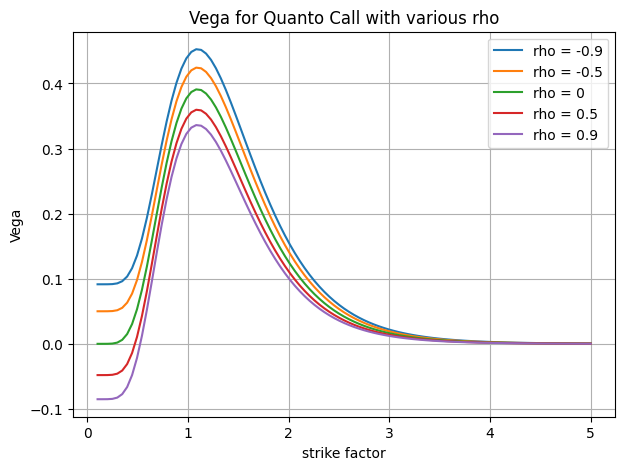

In [3]:
ks = np.linspace(0.1, 5, 101)
rhos = [-0.9, -0.5, 0, 0.5, 0.9]

df = pd.DataFrame()
df['strike factor'] = ks

for rho in rhos:           
    vegas = [ba.quanto_call_vega(rd, rf, volS, volX, rho, k, T) for k in ks]  
    vegasfd = [ba.quanto_call_vega(rd, rf, volS, volX, rho, k, T) for k in ks]
    err = [c-f for c, f in zip(vegas, vegasfd)]
    df['rho = ' + str(rho)] = np.array(vegas)

df = df.set_index('strike factor')
df.plot(grid=True, figsize=(7, 5))
plt.title("Vega for Quanto Call with various rho")
plt.xlabel("strike factor")
plt.ylabel("Vega")

#plt.savefig("L4_FigQuantoVega1.png")
plt.show()

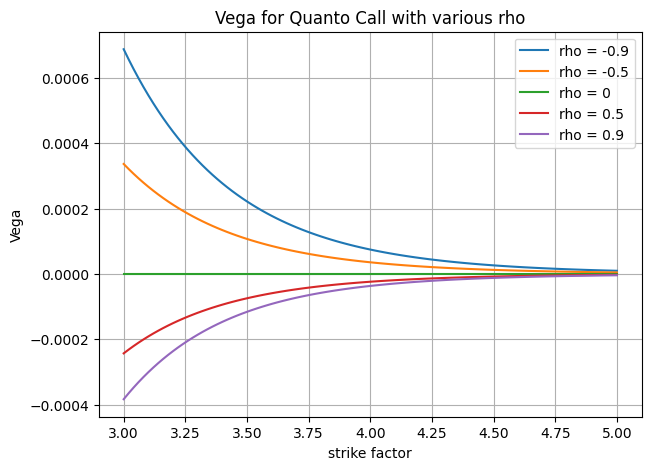

In [4]:
ks = np.linspace(3, 5, 101)
rhos = [-0.9, -0.5, 0, 0.5, 0.9]

df = pd.DataFrame()
df['strike factor'] = ks

for rho in rhos:           
    vegas = [ba.quanto_call_vega_12(rd, rf, volS, volX, rho, k, T) for k in ks]     
    df['rho = ' + str(rho)] = np.array(vegas)

df = df.set_index('strike factor')
df.plot(grid=True, figsize=(7, 5))
plt.title("Vega for Quanto Call with various rho")
plt.xlabel("strike factor")
plt.ylabel("Vega")

#plt.savefig("L4_FigQuantoVega2.png")
plt.show()